## Variables and Methods Definitions

### Import utility functions from external reference python file

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import importlib

import clustering, utilities, recs_preprocessing

importlib.reload(clustering)
importlib.reload(utilities)
importlib.reload(recs_preprocessing)

from utilities import KWH2BTU, BTU2KWH, SQF2SQM, SQM2SQF, THM2BTU, BTU2THM
from recs_preprocessing import Codebook, df_computed
from clustering import cluster_subset, evaluate_gmm

NEEDED FOR RC:
+ equipment power density [W/m^2]
+ lighting power density [W/m^2]
+ gas power density [W/m^2]

In [10]:
# energy loads
categorical_columns = []
continuous_columns = ['RC_equipment_power_density', 'RC_gas_power_density', 'RC_DHW_elec_power_density', 'RC_DHW_gas_power_density', 'RC_lighting_power_density']

In [11]:
# construction
categorical_columns = ['CELLAR', 'CRAWL', 'CONCRETE', 'BASEOTH', 'BASEFIN', 'ATTIC', 'ATTICFIN', 'WALLTYPE', 'ROOFTYPE', 'ADQINSUL', 'TYPEGLASS', 'WINFRAME']
continuous_columns = [
'eui_kwh_elec_thermal', 'eui_btu_ng_thermal', 'eui_btu_ofuel_thermal', 'window_per_sqm', 'door_per_sqm'
]

In [12]:
# systems
categorical_columns = [
    'EQUIPM', 'FUELHEAT', 'BASEHEAT', 'GARGHEAT', 'ATTCHEAT', 'GEOHP',
    'AIRCOND', 'COOLAPT', 'ACEQUIPM_PUB', 'BASECOOL', 'ATTCCOOL', 'GARGCOOL', 'EQUIPAGE', 'ACEQUIPAGE'
] # systems -> heating and cooling system
continuous_columns = [
    'eui_kwh_elec_sph', 'eui_btu_ng_sph', 'eui_btu_ofuel_sph',
    'eui_kwh_elec_col', 'eui_kwh_elec_latent'
]

In [38]:
df_computed.groupby(
    by=['IECC_climate_code', 'TYPEHUQ']
).agg(
    {
        'NWEIGHT': 'sum',
        'STATE_FIPS': 'count',
    }
)

NWEIGHT  STATE_FIPS
IECC_climate_code TYPEHUQ                           
1A                1         16405.834825           1
                  2        959089.396592         229
                  3        174890.328887          46
                  4        151857.485400          23
                  5        847711.892432         101
...                                  ...         ...
8AK               1           944.436797           1
                  2         35732.293570          39
                  3          6375.085304          10
                  4          2167.750262           2
                  5          2185.886938           2

[83 rows x 2 columns]

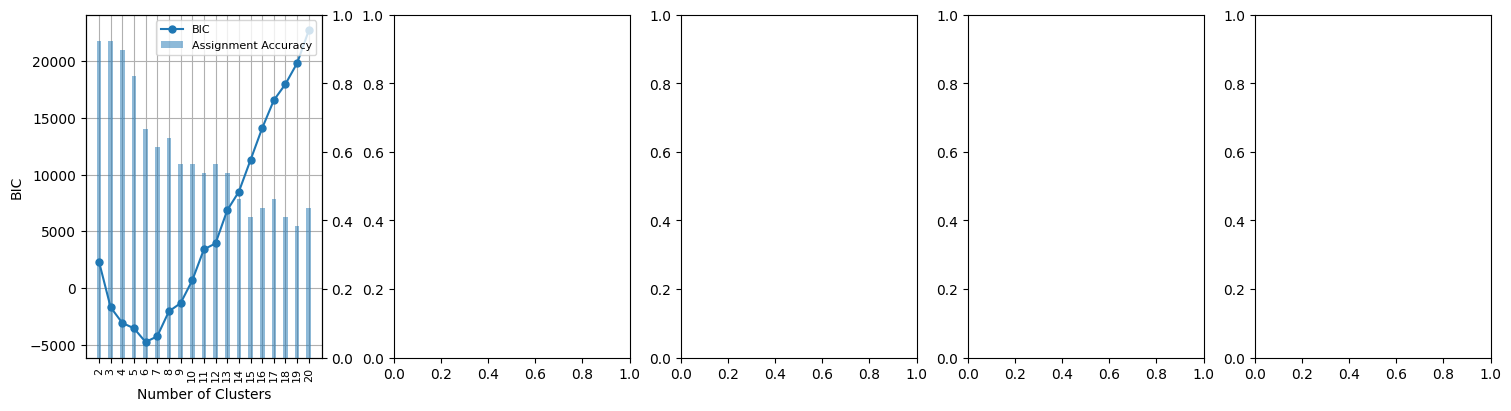

In [40]:
subset_criteria = {'IECC_climate_code': '6A', 'TYPEHUQ': 3}
fig, axes = plt.subplots(1, 5, figsize=(15, 4), layout='constrained')
da, metrics = cluster_subset(categorical_columns, continuous_columns, subset_criteria, evaluate_gmm, fig, axes, axpos=0)

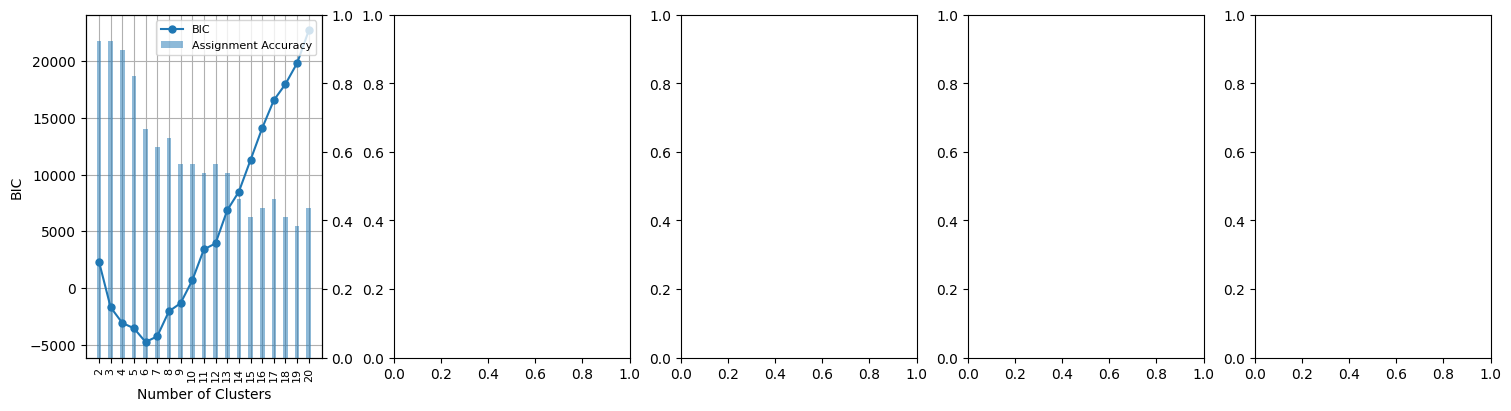

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4), layout='constrained')
bics = [m.BIC for m in metrics]
bmax = np.max(bics)
bmin = np.min(bics)
axpos=0
interval=np.arange(2, 21)
axes[axpos].plot(interval, bics, marker='o', markersize=5, label='BIC')
axes[axpos].set_xticks(interval, interval)
axes[axpos].set_xticklabels(interval, rotation=90, fontsize=8)
axes[axpos].set_ylabel('BIC')
axes[axpos].set_xlabel('Number of Clusters')
axes[axpos].grid(True)
bg = (bmax - bmin) * 0.01
from clustering import evaluate_mls
axtwin = axes[axpos].twinx()
axtwin.bar(interval, [evaluate_mls(m, da.index, plot=False)[0]['Accuracy'].max() for m in metrics], .4, alpha=0.5, label='Assignment Accuracy')
axtwin.set_ylim(0, 1)
handles, labels = axes[axpos].get_legend_handles_labels()
handles2, labels2 = axtwin.get_legend_handles_labels()
axes[axpos].legend(handles + handles2, labels + labels2, loc='upper right', prop={'size': 8})


In [16]:
from clustering import evaluate_mls

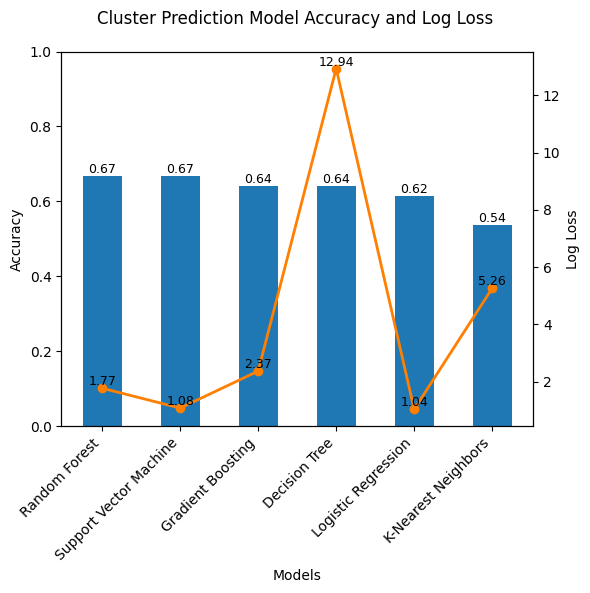

(                    Model  Accuracy   Log Loss
 0           Random Forest  0.666667   1.771901
 1  Support Vector Machine  0.666667   1.078508
 2       Gradient Boosting  0.641026   2.371619
 3           Decision Tree  0.641026  12.938747
 4     Logistic Regression  0.615385   1.035607
 5     K-Nearest Neighbors  0.538462   5.262076,
 0             Random Forest
 1    Support Vector Machine
 2         Gradient Boosting
 3             Decision Tree
 4       Logistic Regression
 5       K-Nearest Neighbors
 Name: Model, dtype: object)

In [58]:
evaluate_mls(metrics[4], da.index)



In [23]:
importlib.reload(clustering)
from clustering import evaluate_mls_kfold

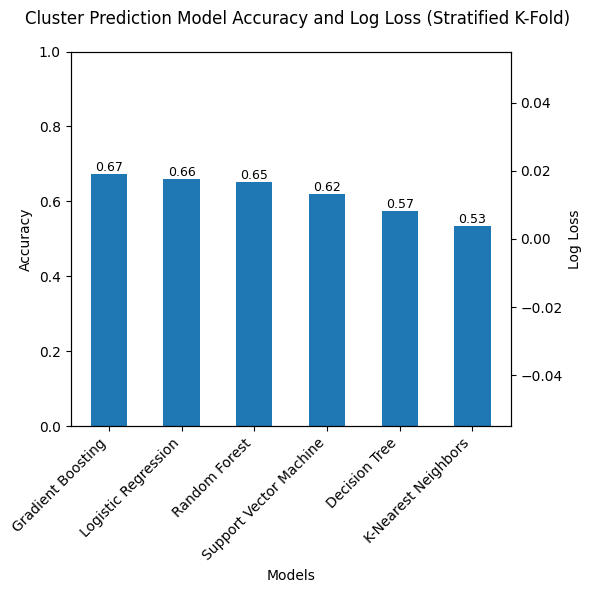

(                    Model  Accuracy  Log Loss
 0       Gradient Boosting  0.673846       NaN
 1     Logistic Regression  0.658769       NaN
 2           Random Forest  0.651077       NaN
 3  Support Vector Machine  0.620000       NaN
 4           Decision Tree  0.573538       NaN
 5     K-Nearest Neighbors  0.534769       NaN,
 0         Gradient Boosting
 1       Logistic Regression
 2             Random Forest
 3    Support Vector Machine
 4             Decision Tree
 5       K-Nearest Neighbors
 Name: Model, dtype: object)

In [34]:
evaluate_mls_kfold(metrics[4], da.index)

In [33]:
importlib.reload(clustering)
from clustering import evaluate_catboost, tune_catboost

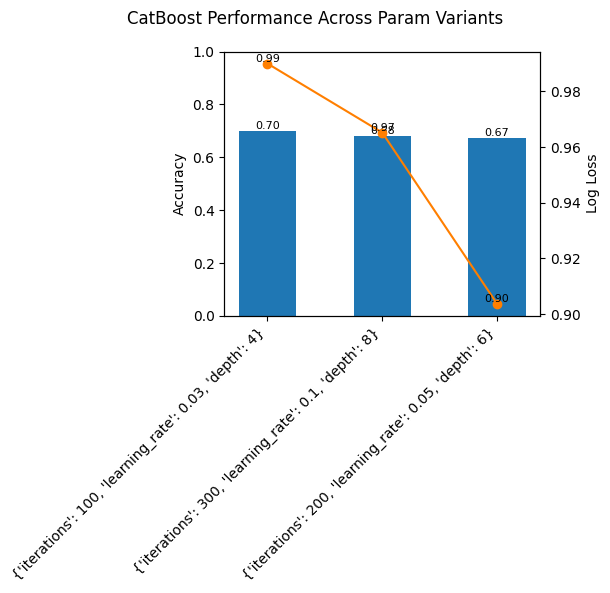

,Params,Accuracy,Log Loss
0,"{'iterations': 100, 'learning_rate': 0.03, 'de...",0.697538,0.990007
2,"{'iterations': 300, 'learning_rate': 0.1, 'dep...",0.682154,0.965194
1,"{'iterations': 200, 'learning_rate': 0.05, 'de...",0.674462,0.903708


In [57]:
evaluate_catboost(metrics[4], da.index)

In [36]:
bm, bs, bp = tune_catboost(metrics[4], da.index)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/lichengxuan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lichengxuan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lichengxuan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lichengxuan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lichengxuan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:6

In [59]:
bs, bp

(0.7052307692307692,
 {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1})

In [ ]:
bm.save_model('test_save_model.json', format='json')
#bm.save_model('test_save_model.onnx', format='onnx')
# onnx style export does not support categorical features
bm.save_model('test_save_model.cbm')

In [74]:
bm.predict(df_computed[excol].loc[da.index]).flatten()

array([5, 1, 3, 4, 5, 1, 5, 5, 3, 1, 4, 5, 1, 5, 1, 5, 1, 5, 1, 5, 3, 1,
       3, 5, 5, 5, 2, 5, 1, 5, 1, 1, 5, 5, 2, 5, 2, 3, 5, 4, 2, 5, 5, 1,
       2, 1, 5, 5, 3, 1, 5, 3, 5, 4, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5, 4, 1,
       5, 1, 5, 1, 1, 5, 2, 4, 5, 2, 5, 3, 2, 1, 1, 5, 1, 3, 2, 1, 2, 4,
       5, 5, 1, 5, 5, 4, 5, 5, 3, 5, 1, 1, 5, 2, 5, 3, 4, 5, 1, 2, 1, 5,
       5, 1, 1, 5, 3, 1, 3, 5, 2, 2, 4, 5, 3, 5, 3, 1, 5, 1, 5])

In [78]:
df_incomplete = df_computed[['TOTSQFT_EN',
 'TYPEHUQ',
 'urban_grouped',
 'acequipm_pub_grouped',
 'FUELHEAT',
 'EQUIPM',
 'YEARMADERANGE',]]

In [ ]:
bm.predict(df_computed[excol].loc[da.index]).flatten()

CatBoostError: Invalid cat_features[5] = 7 value: index must be < 7.

In [69]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.load_model("test_save_model.json", format='json')
model.load_model("test_save_model.cbm")   # or .json
model.best_score_

{'learn': {'MultiClass': 0.5193223868695711}}

In [39]:

import shap
excol = ['TOTSQFT_EN', 'TYPEHUQ', 'urban_grouped', 'acequipm_pub_grouped', 'FUELHEAT', 'EQUIPM', 'YEARMADERANGE', 'CELLAR', 'WALLTYPE', 'BASEFIN', 'num_u65', 'NUMADULT2',]
# X must be the same feature space as used for training (pandas DataFrame)
model = bm
X = df_computed[excol].loc[da.index]

# SHAP expects raw feature values — do NOT encode or scale
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


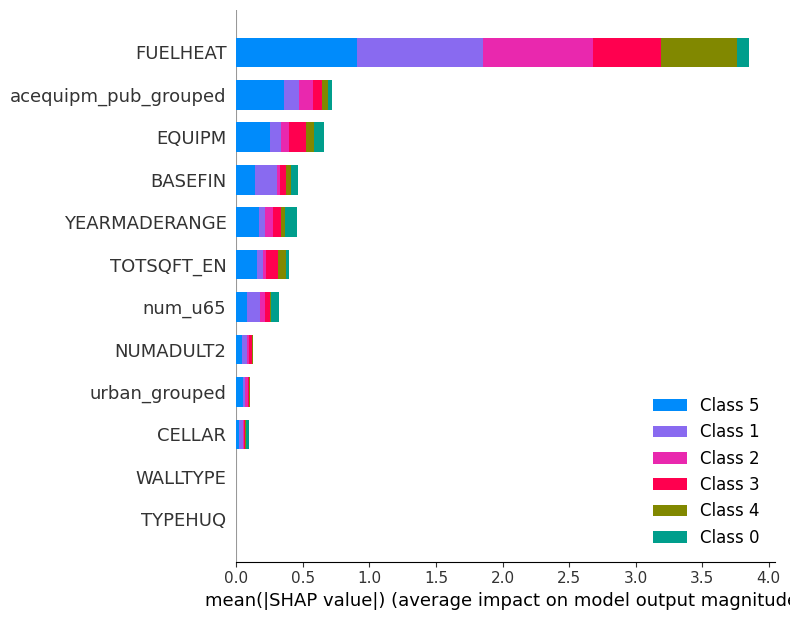

In [47]:
shap.summary_plot(shap_values, X, plot_type="bar")



<Figure size 500x500 with 0 Axes>

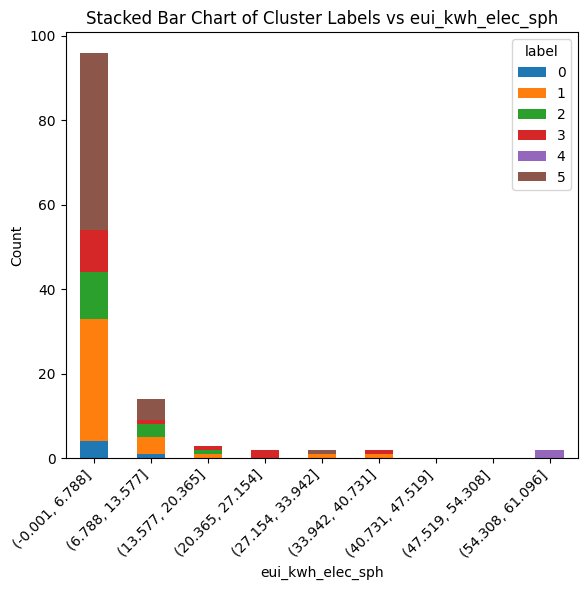

<Figure size 500x500 with 0 Axes>

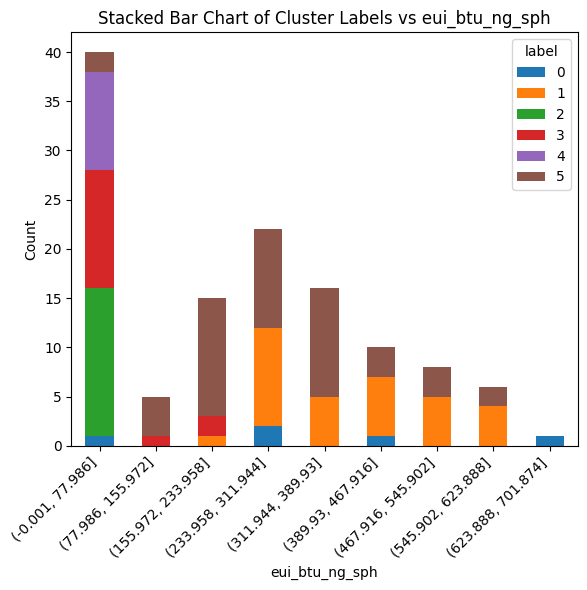

<Figure size 500x500 with 0 Axes>

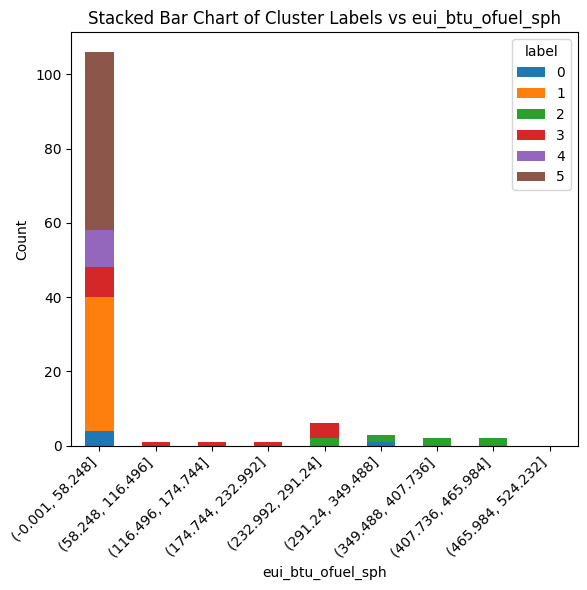

<Figure size 500x500 with 0 Axes>

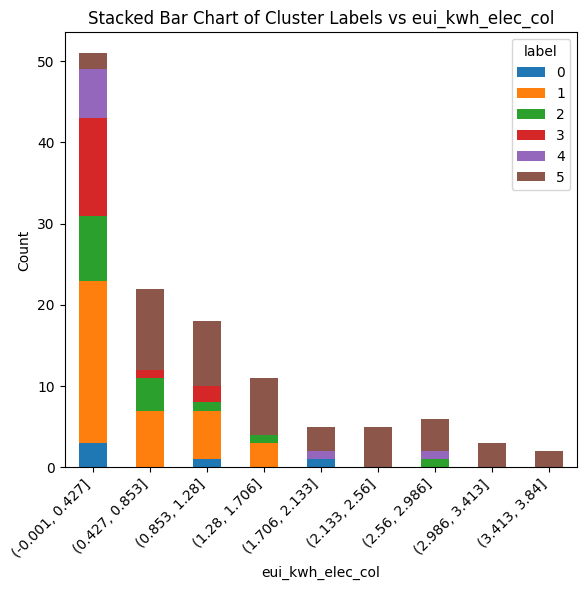

<Figure size 500x500 with 0 Axes>

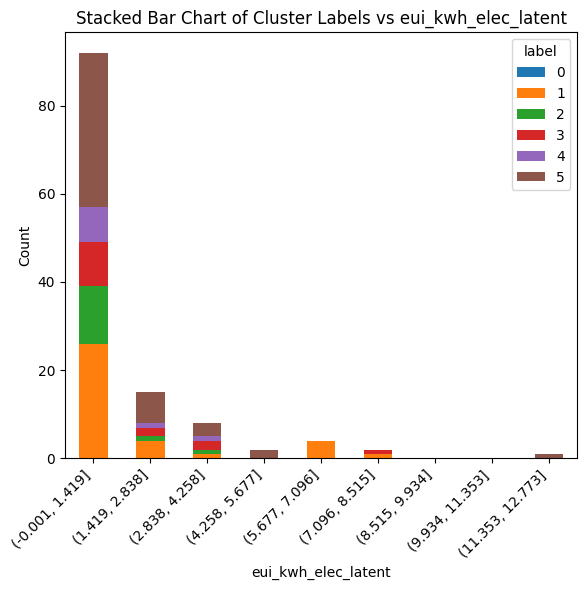

<Figure size 500x500 with 0 Axes>

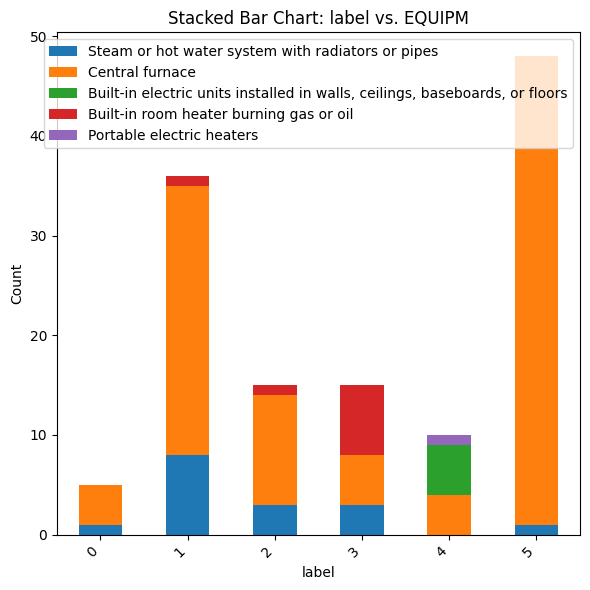

<Figure size 500x500 with 0 Axes>

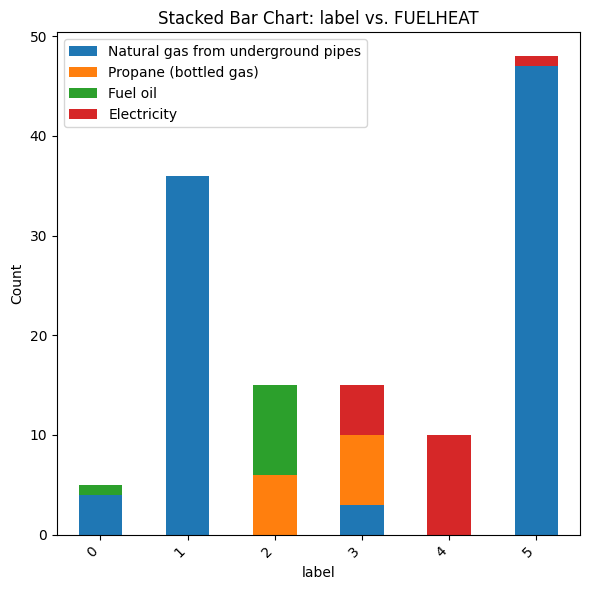

<Figure size 500x500 with 0 Axes>

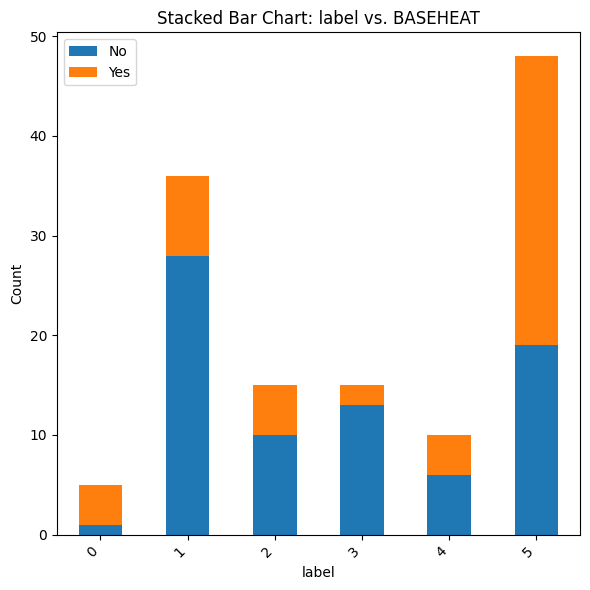

<Figure size 500x500 with 0 Axes>

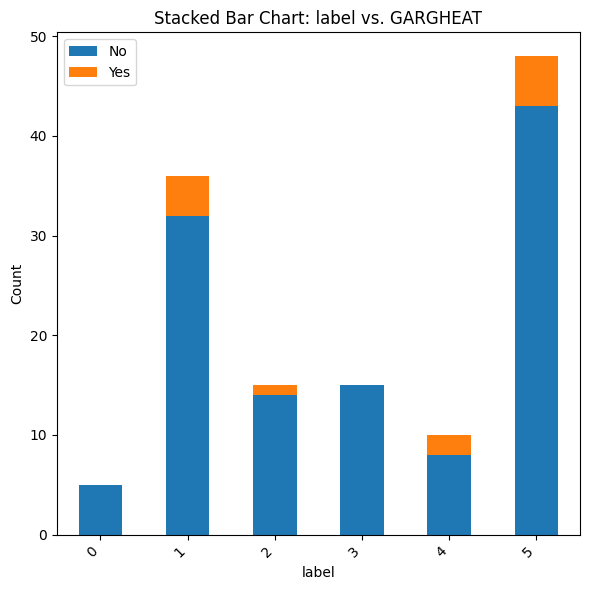

<Figure size 500x500 with 0 Axes>

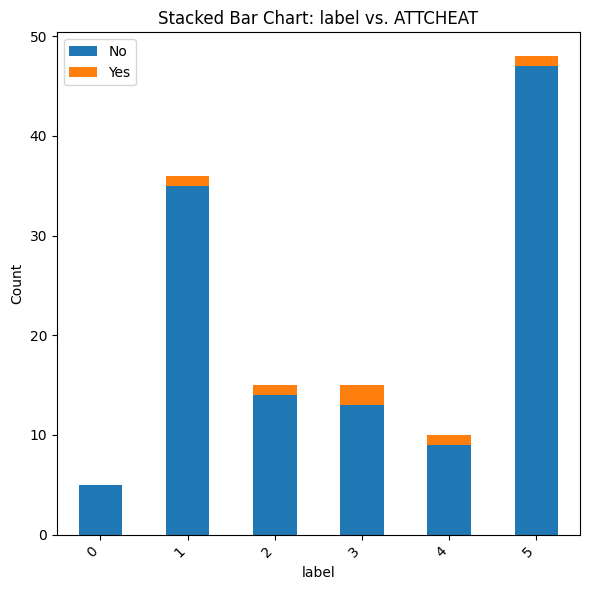

<Figure size 500x500 with 0 Axes>

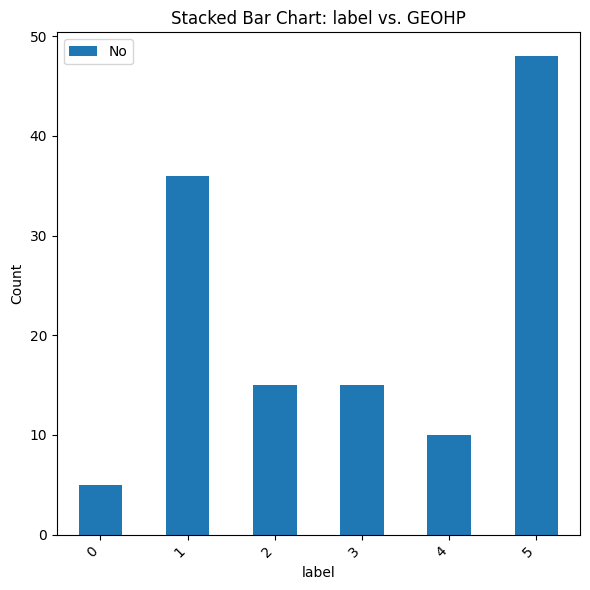

<Figure size 500x500 with 0 Axes>

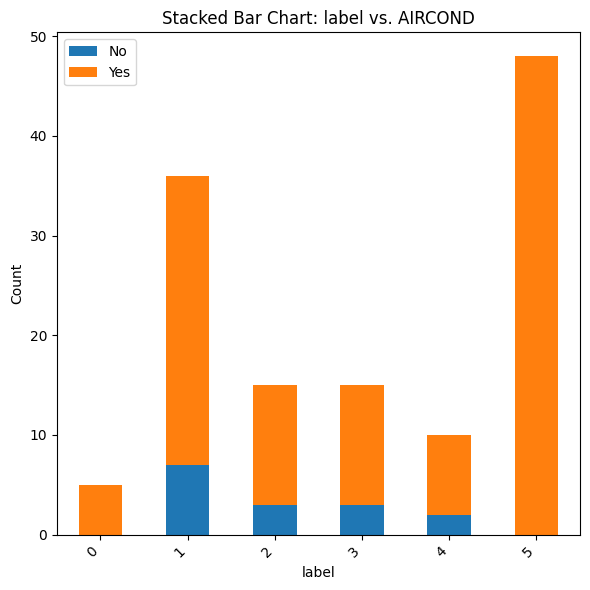

<Figure size 500x500 with 0 Axes>

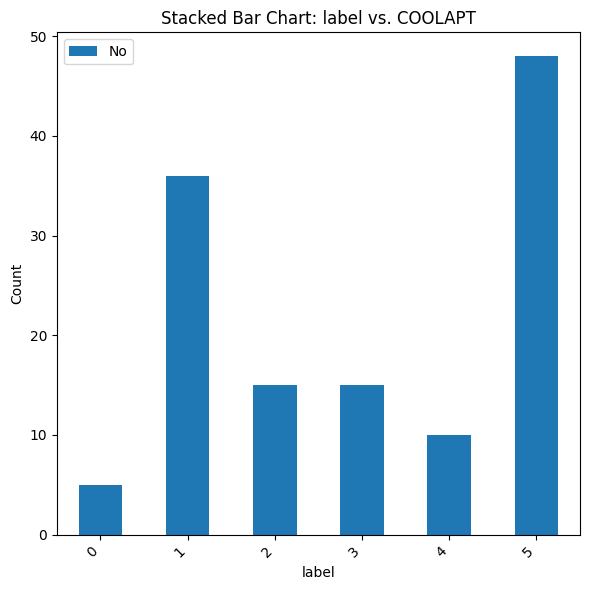

<Figure size 500x500 with 0 Axes>

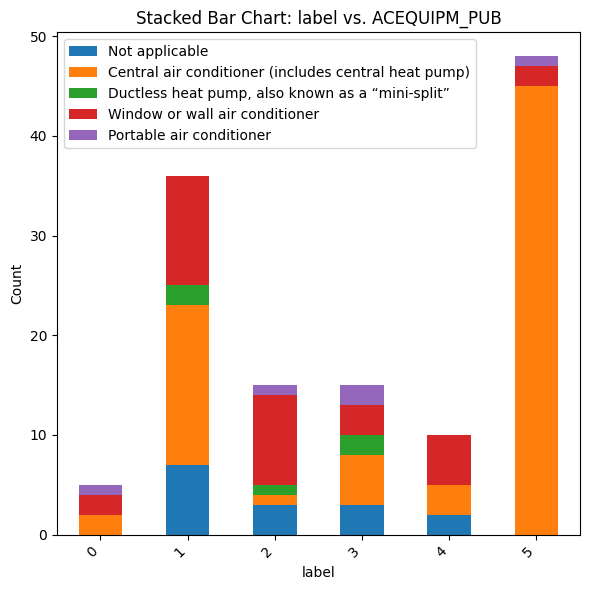

<Figure size 500x500 with 0 Axes>

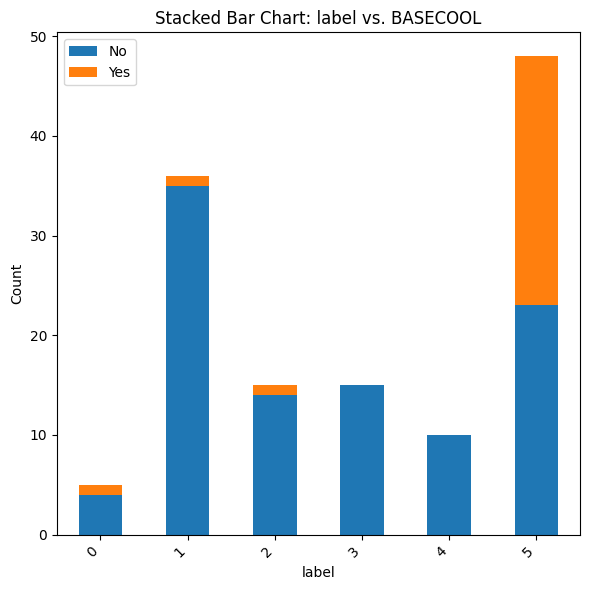

<Figure size 500x500 with 0 Axes>

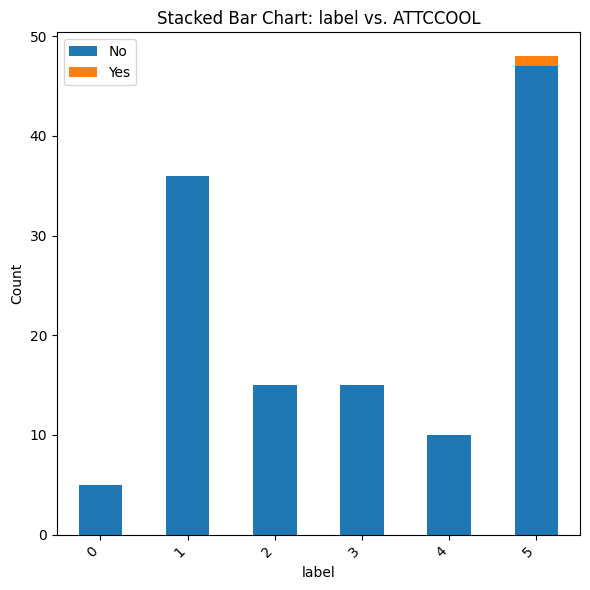

<Figure size 500x500 with 0 Axes>

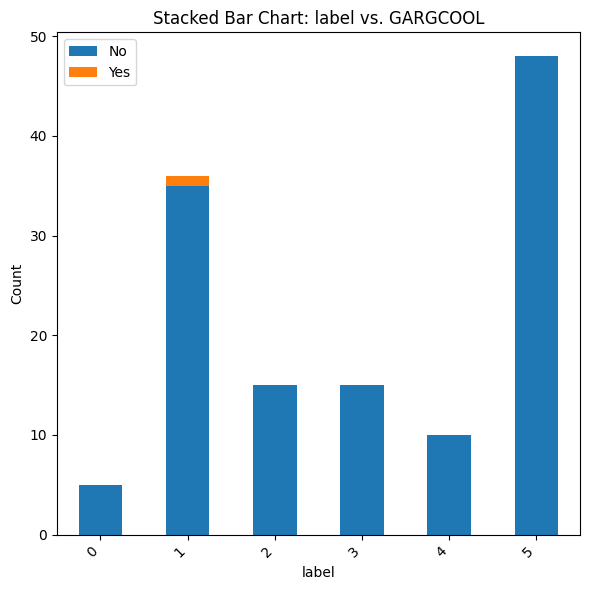

<Figure size 500x500 with 0 Axes>

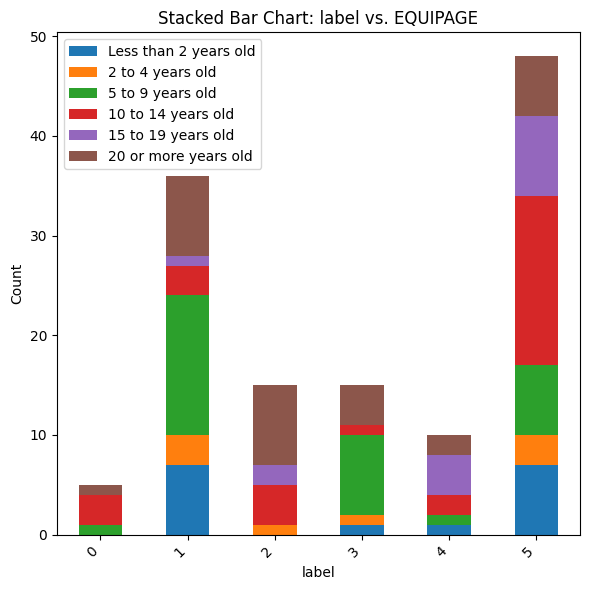

<Figure size 500x500 with 0 Axes>

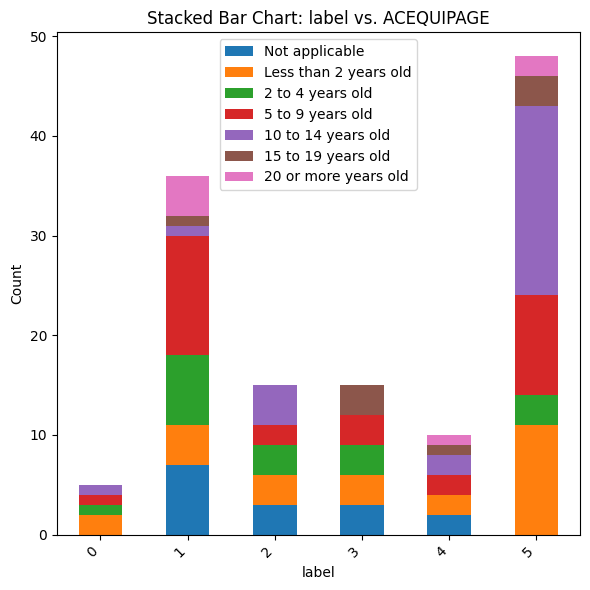

In [71]:
clustering.plot_cluster_result_bars(da, metrics[4])

fig, axes = plt.subplots(1, 5, figsize=(15, 4), layout='constrained')
names = ['Mobile homes (1)', 'Single-family detached (2)', 'Single-family attached (3)', 'Apartments 2-4 (4)',
'Apartments 5+ (5)']
das = []
metrics = []
is_construction = False
for i in [1, 2, 3, 4, 5]:
    subset_criteria = {'IECC_climate_code': '6A', 'TYPEHUQ': i}
    print(i)
    
    if i == 5 & is_construction:
        d, m = cluster_subset(categorical_columns, continuous_columns, subset_criteria, evaluate_kmeans, fig, axes, axpos=i - 1, BIC=False);
    else:
        d, m =cluster_subset(categorical_columns, continuous_columns, subset_criteria, evaluate_gmm, fig, axes, axpos=i - 1, BIC=True);
    axes[i - 1].set_title(names[i - 1])
    das.append(d)
    metrics.append(m)
fig.suptitle('Construction sub-archetypes clustering and prediction performance for different number of clusters', fontsize=12);
#fig.savefig('print/construction_cluster_performance.png')

[ evaluate_mls(m, 0, plot=False)[0]['Accuracy'].max() * (bmax - bmin) for m in metrics[0]]

## Saving to joblib

sub_archetype_category = 'Systems'
group_no = [1, 2, 3, 4, 5]
cluster_counts = [2, 8, 3, 5, 3] # Sys [2, 8, 3, 5, 3] Cons [2, 7, 2, 3, 3]
predictor_names = [
    'Random Forest',
    'Support Vector Machine',
    'Logistic Regression',
    'Logistic Regression',
    'Gradient Boosting',
] # cons

predictor_names = [
    'Random Forest',
    'Logistic Regression',
    'Logistic Regression',
    'Support Vector Machine',
    'Gradient Boosting',
] # sys

for gn, cc, pn in zip(group_no, cluster_counts, predictor_names):
    dump(
        metrics[gn - 1][cc - 2].pipelines[pn],
        f'models/{sub_archetype_category}_{gn}.joblib'
    )

Attributes to cluster:
['EQUIPM', 'FUELHEAT', 'BASEHEAT', 'GARGHEAT', 'ATTCHEAT', 'GEOHP', 'AIRCOND', 'COOLAPT', 'ACEQUIPM_PUB', 'BASECOOL', 'ATTCCOOL', 'GARGCOOL', 'EQUIPAGE', 'ACEQUIPAGE', 'eui_kwh_elec_sph', 'eui_btu_ng_sph', 'eui_btu_ofuel_sph', 'eui_kwh_elec_col', 'eui_kwh_elec_latent']


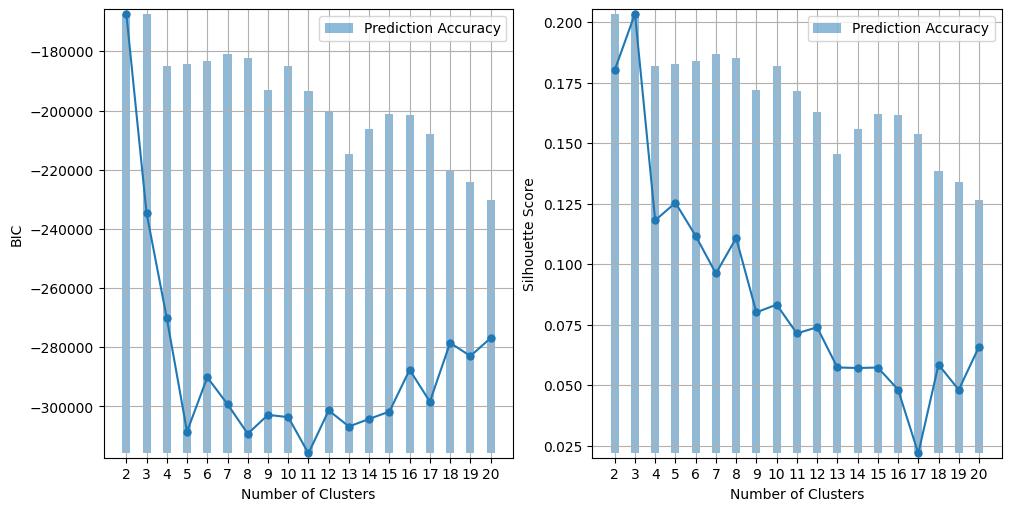

In [ ]:
#attributes_to_cluster = ccat_active_loads + ccon_active_loads
subset_criteria = {'IECC_climate_code': '6A'} #'TYPEHUQ': 3
da, metrics = cluster_subset(
    categorical_columns, continuous_columns, subset_criteria, evaluate_gmm)
print('Attributes to cluster:')
print(categorical_columns + continuous_columns)

In [ ]:
sub_archetype_category = 'SpaceLoads'
dump(
    metrics[3 - 2].pipelines['Logistic Regression'],
    f'models/{sub_archetype_category}_all.joblib'
)

['models/SpaceLoads_all.joblib']

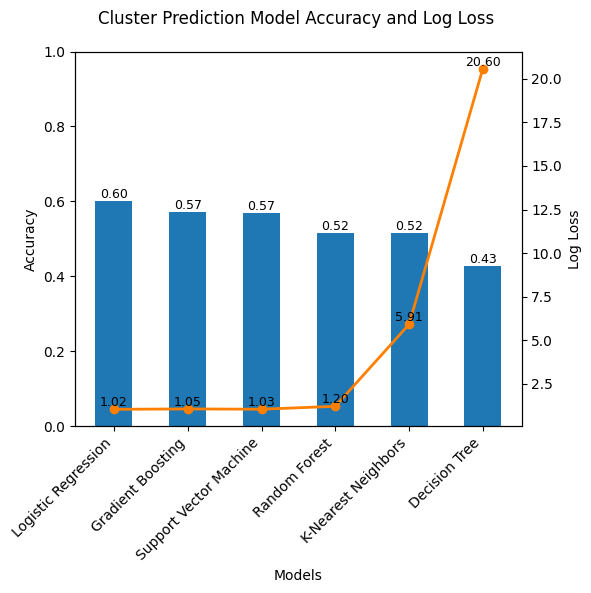

(                    Model  Accuracy   Log Loss
 0     Logistic Regression  0.601610   1.024743
 1       Gradient Boosting  0.571429   1.047172
 2  Support Vector Machine  0.569416   1.029899
 3           Random Forest  0.515091   1.196574
 4     K-Nearest Neighbors  0.515091   5.906537
 5           Decision Tree  0.428571  20.596373,
 0       Logistic Regression
 1         Gradient Boosting
 2    Support Vector Machine
 3             Random Forest
 4       K-Nearest Neighbors
 5             Decision Tree
 Name: Model, dtype: object)

In [ ]:
N = 4
N = N - 2 
evaluate_mls(metrics[N], da.index)

In [ ]:
all_labels = np.unique(metrics[N].labels)
da_temp = da.copy()
da_temp['label'] = metrics[N].labels


# Group the dataframe by the "label" column
grouped = da_temp.groupby("label")

# Calculate statistics for each cluster
cluster_stats = grouped.apply(lambda group: pd.Series({
    "Most Frequent Categorical Values": group[categorical_columns].mode().iloc[0].to_dict(),
    "Mean of Continuous Values": group[continuous_columns].mean().to_dict()
}))

# Convert results to a more readable format (optional)
formatted_cluster_stats = cluster_stats.to_dict()
charized = pd.concat([
    pd.DataFrame(formatted_cluster_stats['Most Frequent Categorical Values']).T,
    pd.DataFrame(formatted_cluster_stats['Mean of Continuous Values']).T
], axis=1)
for c in charized.columns:
    if c in categorical_columns:
        lgd = get_legend(c).set_index('code')
        charized[c] = charized[c].astype(int)
        charized[c] = charized[c].apply(lambda x: lgd.loc[str(x)])
charized_reg = regular_display_df(
    charized
)
charized_reg
#charized_reg.T.to_csv('output/energyloads.csv')

,CELLAR,CRAWL,CONCRETE,BASEOTH,BASEFIN,ATTIC,ATTICFIN,WALLTYPE,ROOFTYPE,ADQINSUL,TYPEGLASS,WINFRAME,eui_kwh_elec_thermal,eui_btu_ng_thermal,eui_btu_ofuel_thermal,window_per_sqm,door_per_sqm
0,Yes,No,No,No,No,Yes,No,"Siding (aluminum, fiber cement, vinyl, or steel)",Shingles (composition or asphalt),Adequately insulated,Double-pane glass,Wood,17.140,0.e+00,538.887,0.103,5.031e-03
1,Yes,No,No,No,Yes,Yes,No,"Siding (aluminum, fiber cement, vinyl, or steel)",Shingles (composition or asphalt),Adequately insulated,Double-pane glass,Wood,11.702,493.27,4.060,0.114,2.381e-03
2,Yes,No,No,No,No,Yes,No,Wood,Shingles (composition or asphalt),Adequately insulated,Double-pane glass,Wood,7.425,38.555,910.399,0.151,1.459e-03
3,Yes,No,No,No,Yes,Yes,No,"Siding (aluminum, fiber cement, vinyl, or steel)",Shingles (composition or asphalt),Adequately insulated,Double-pane glass,Wood,13.565,378.122,13.804,0.089,4.754e-03
4,Yes,No,No,No,No,Yes,No,"Siding (aluminum, fiber cement, vinyl, or steel)",Metal,Adequately insulated,Double-pane glass,Wood,31.496,306.163,76.789,0.104,4.419e-03
5,Yes,No,No,No,No,Yes,No,Shingle (composition),Shingles (composition or asphalt),Adequately insulated,Single-pane glass,Wood,14.849,699.074,5.065,0.127,2.303e-03
6,Yes,No,No,No,No,Yes,No,"Siding (aluminum, fiber cement, vinyl, or steel)",Shingles (composition or asphalt),Well insulated,Double-pane glass,Composite,10.887,1.92,445.379,0.094,5.868e-03


<Figure size 500x500 with 0 Axes>

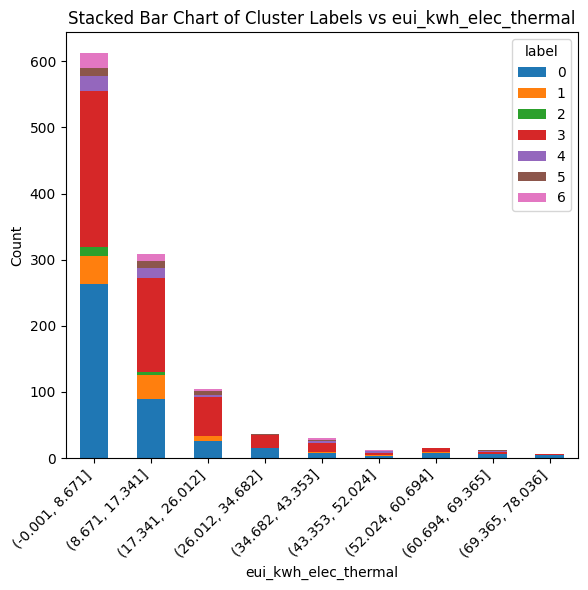

<Figure size 500x500 with 0 Axes>

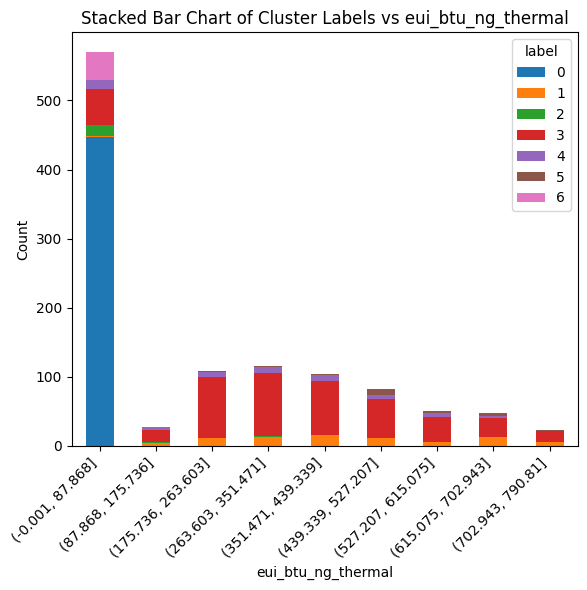

<Figure size 500x500 with 0 Axes>

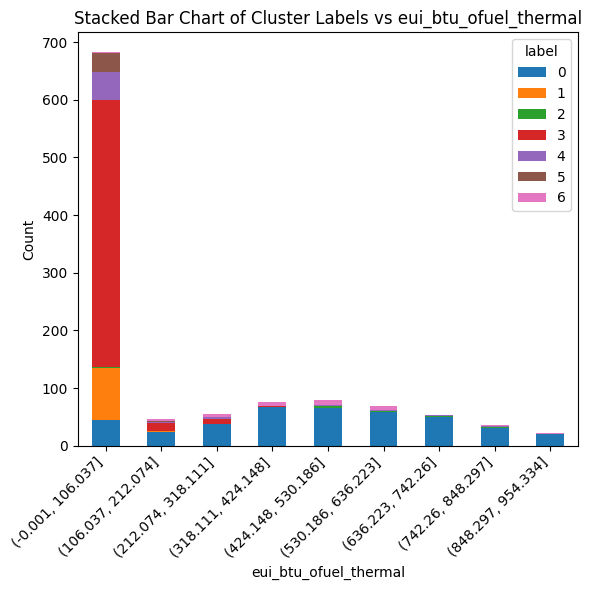

<Figure size 500x500 with 0 Axes>

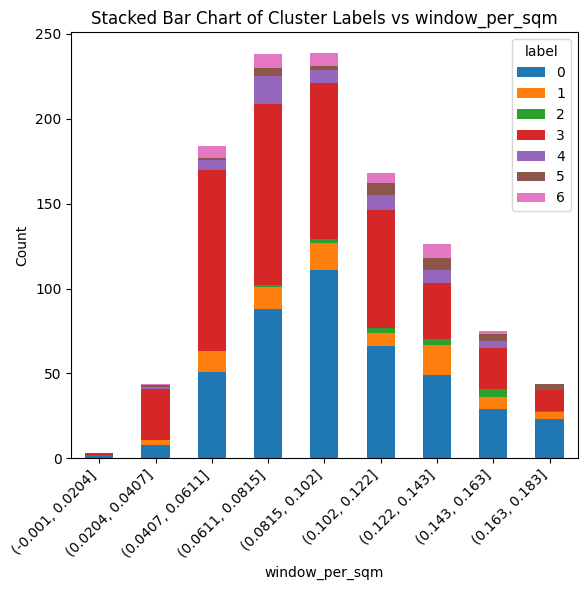

<Figure size 500x500 with 0 Axes>

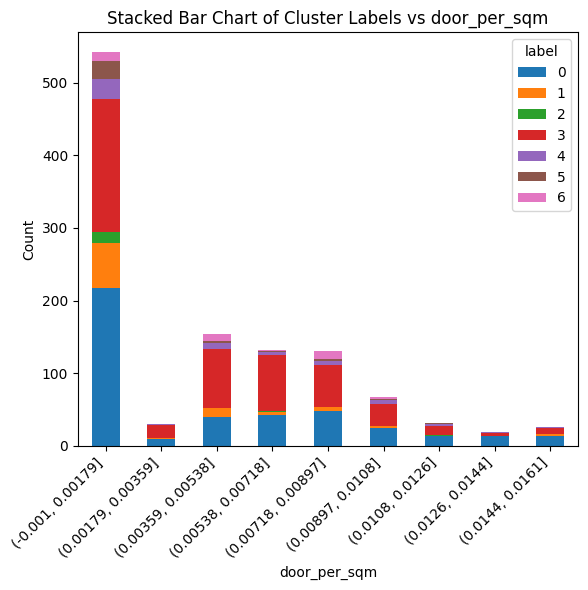

<Figure size 500x500 with 0 Axes>

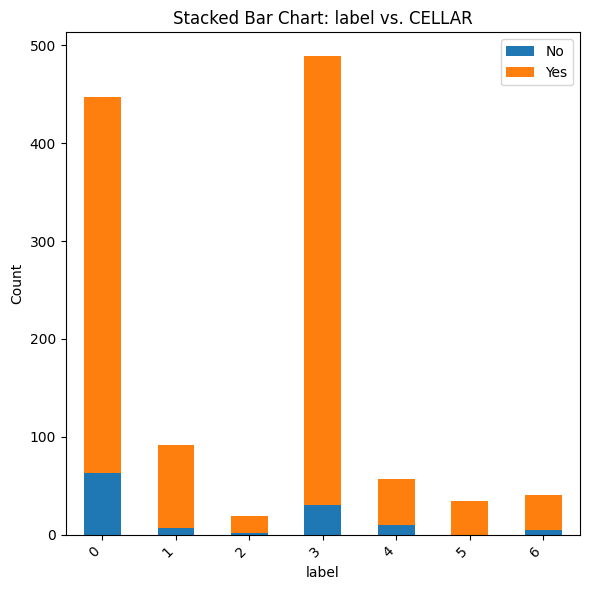

<Figure size 500x500 with 0 Axes>

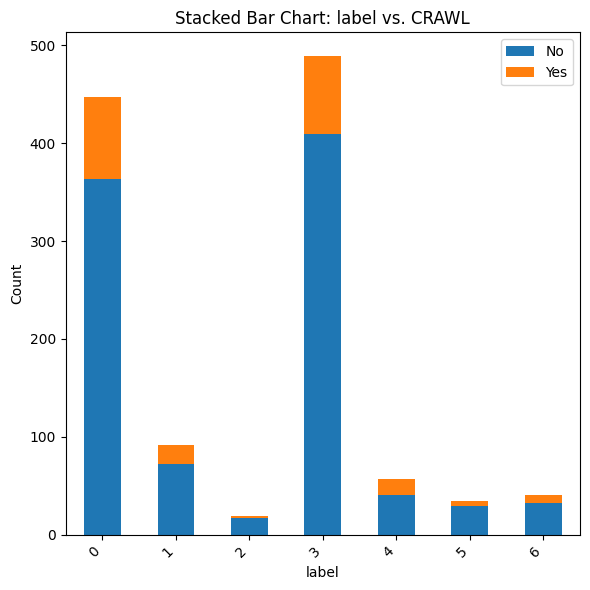

<Figure size 500x500 with 0 Axes>

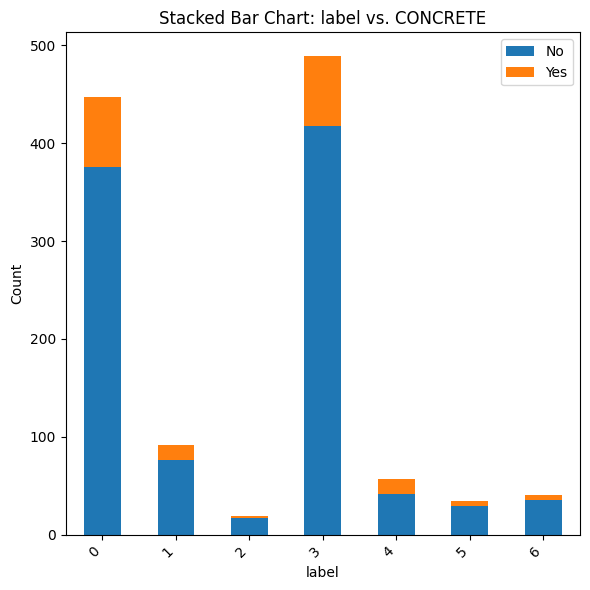

<Figure size 500x500 with 0 Axes>

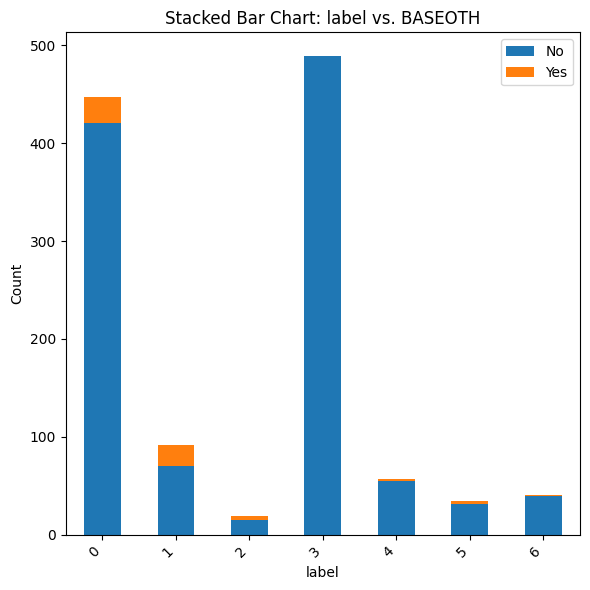

<Figure size 500x500 with 0 Axes>

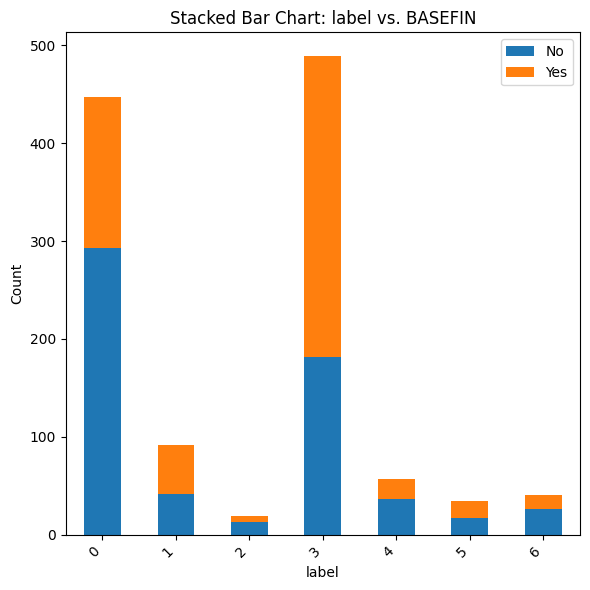

<Figure size 500x500 with 0 Axes>

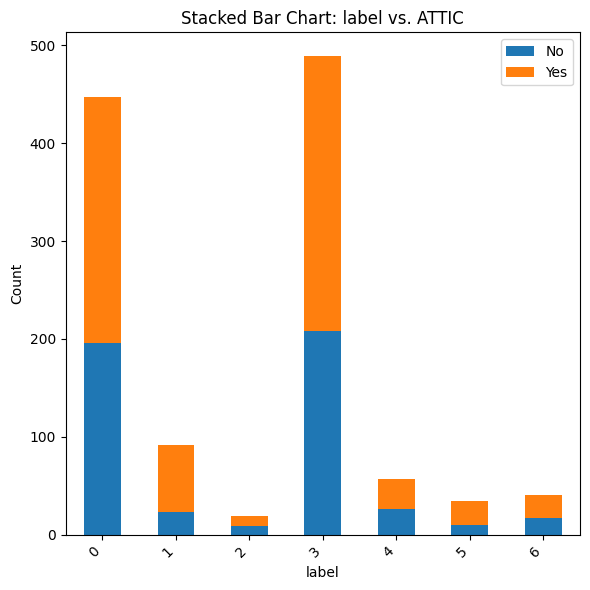

<Figure size 500x500 with 0 Axes>

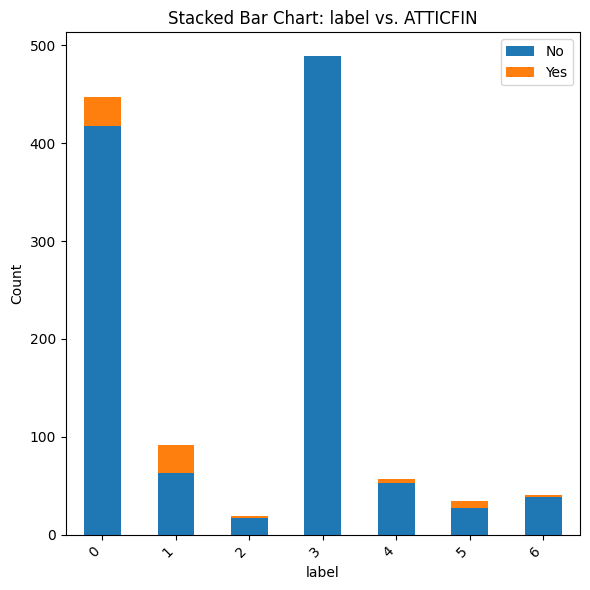

<Figure size 500x500 with 0 Axes>

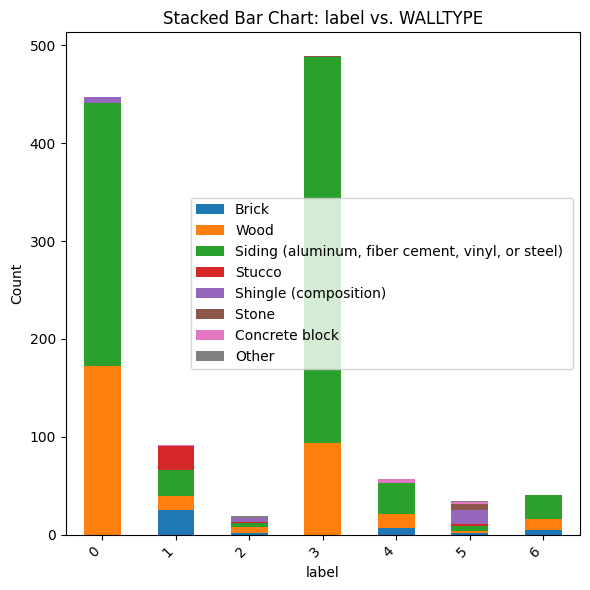

<Figure size 500x500 with 0 Axes>

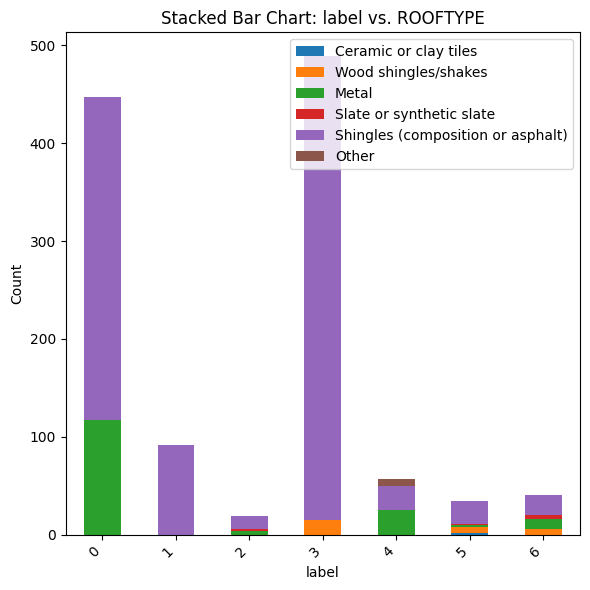

<Figure size 500x500 with 0 Axes>

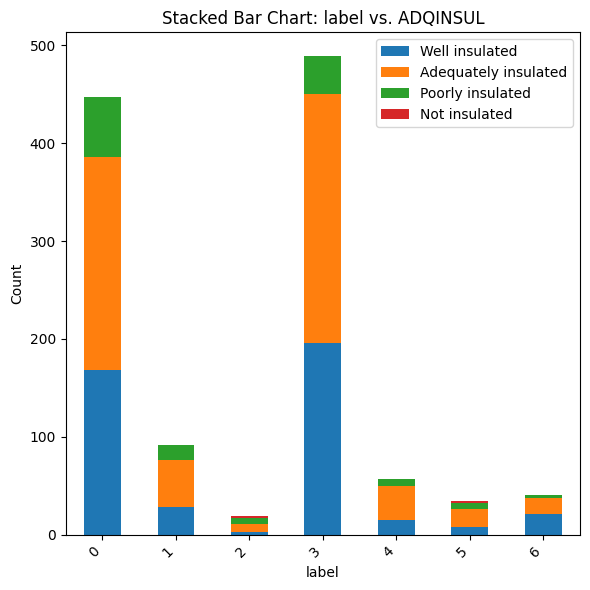

<Figure size 500x500 with 0 Axes>

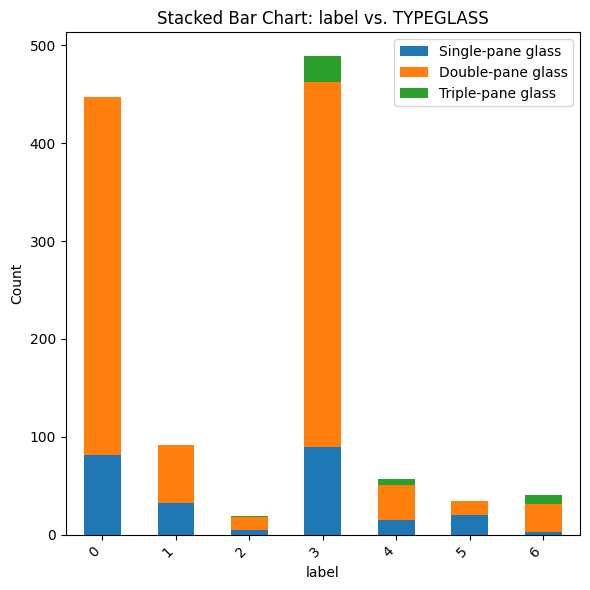

<Figure size 500x500 with 0 Axes>

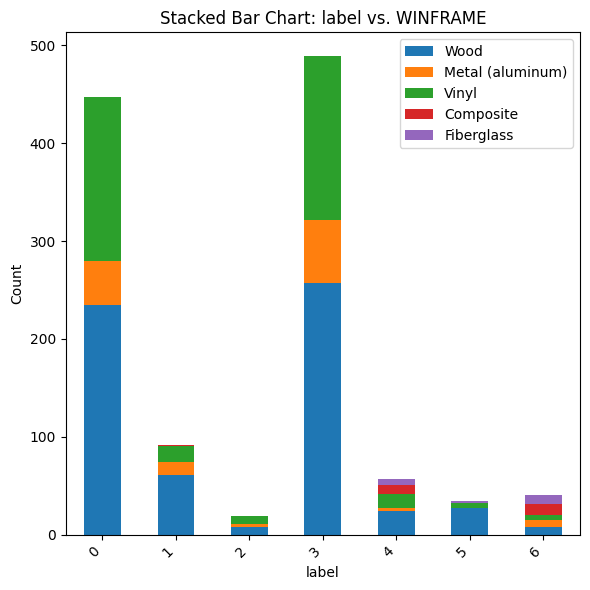

In [ ]:
plot_cluster_result_bars(da, metrics[N], ccon=continuous_columns, ccat=categorical_columns)

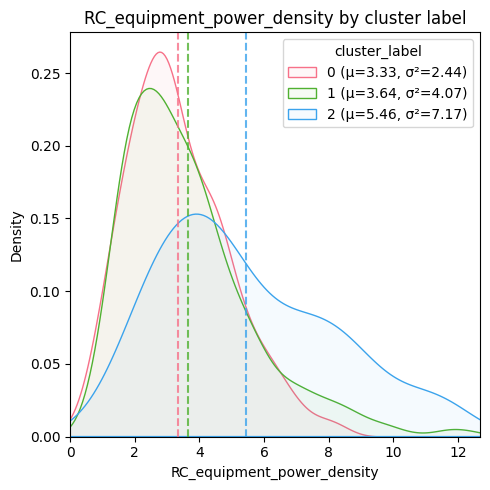

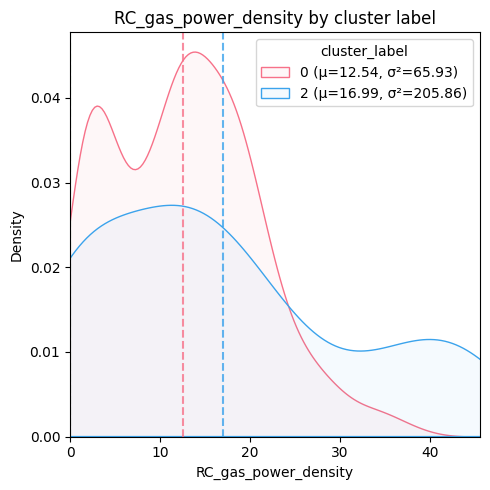

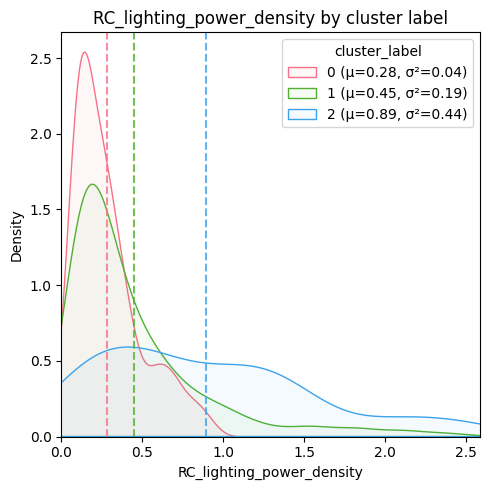

In [ ]:
fig, _ = continuous_feature_kde(da, 'RC_equipment_power_density', metrics[N], 0.99)
fig.savefig('print/epd.png')
fig, _ = continuous_feature_kde(da, 'RC_gas_power_density', metrics[N], 0.99)
fig.savefig('print/gpd.png')QD
fig, _ = continuous_feature_kde(da, 'RC_lighting_power_density', metrics[N], 0.99)
fig.savefig('print/lpd.png')

In [ ]:
dac = da.copy()
dac['label'] = metrics[N].labels
tpl = compute_cluster_statistics(dac, 'label', categorical_columns, continuous_columns,).sort_values('Cluster')

In [ ]:
tpl

,Cluster,RC_equipment_power_density,RC_gas_power_density,RC_lighting_power_density
0,0,3.330728,12.540426,0.282074
2,1,3.728586,0.000000,0.448256
1,2,6.198612,26.633968,1.287061


In [ ]:
for c in categorical_columns:
    print(c)
    tpl[c] = tpl[c].apply(lambda x: get_legend(c).set_index('code').loc[str(x)])
tpl

,Cluster,RC_equipment_power_density,RC_gas_power_density,RC_lighting_power_density
0,0,3.330728,12.540426,0.282074
2,1,3.728586,0.000000,0.448256
1,2,6.198612,26.633968,1.287061


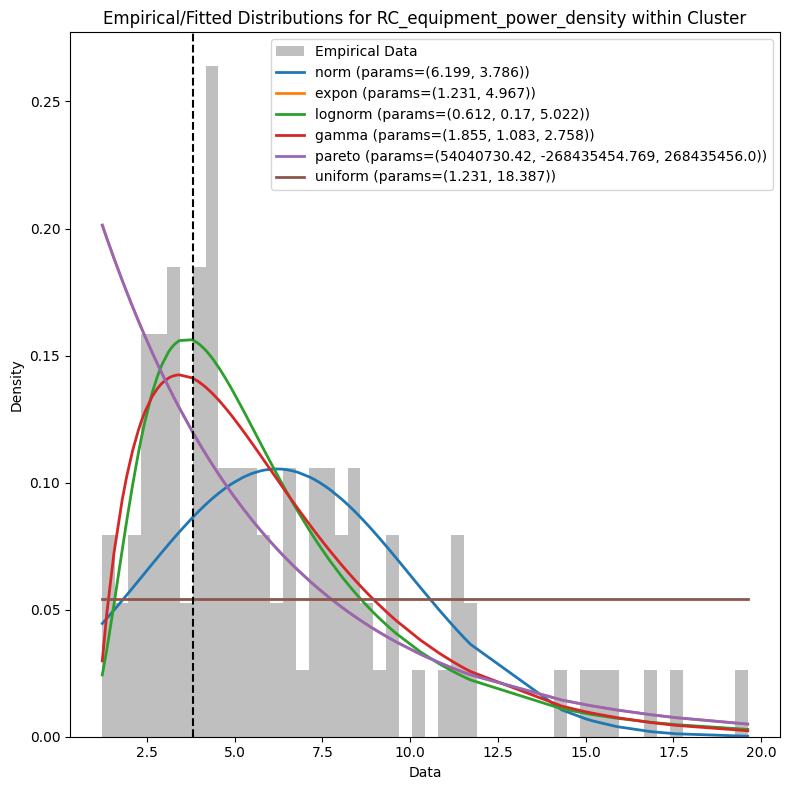

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm, expon, kstest, anderson, entropy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, anderson, entropy
from scipy.stats import norm, expon  # Add more distributions as needed

def evaluate_distribution_fit(series: pd.Series, distributions=['norm', 'expon', 'lognorm', 'gamma', 'pareto', 'uniform'], bins=50, plot=True, title_extra=''):
    """
    Evaluates how well an empirical distribution (data column) fits reference distributions
    and plots the empirical and fitted distributions.

    Parameters:
        series (pd.Series): The data column to test.
        distributions (list): List of distribution names to test against (default: ['norm', 'expon']).
        bins (int): Number of bins for histogram-based metrics (default: 50).
        plot (bool): Whether to plot the empirical and fitted distributions (default: True).

    Returns:
        pd.DataFrame: A DataFrame with fit statistics and parameters for each distribution.
    """
    results = []

    # Remove NaN values
    data = series.dropna()
    
    # Sort data for plotting PDFs
    sorted_data = np.sort(data)
    
    # Create a figure for plotting if enabled
    if plot:
        plt.figure(figsize=(8, 8))
        plt.hist(data, bins=bins, density=True, alpha=0.5, label="Empirical Data", color="gray")

    # Loop over each distribution
    for dist_name in distributions:
        # Get the distribution object
        dist = getattr(__import__('scipy.stats', fromlist=[dist_name]), dist_name)
        
        # Fit the distribution to the data
        params = dist.fit(data)
        
        # Generate the PDF for the fitted distribution
        ref_pdf = dist.pdf(sorted_data, *params)
        
        # Add the fitted distribution to the plot
        if plot:
            params_truncated = tuple(round(float(p), 3) for p in params) 
            plt.plot(sorted_data, ref_pdf, label=f'{dist_name} (params={params_truncated})', linewidth=2)

        # Calculate histogram-based empirical density
        emp_hist, edges = np.histogram(data, bins=bins, density=True)
        emp_pdf = emp_hist / emp_hist.sum()
        bin_centers = (edges[:-1] + edges[1:]) / 2
        
        # Interpolate the reference PDF to align with bin centers
        ref_pdf_hist = np.interp(bin_centers, sorted_data, ref_pdf)
        
        # Goodness-of-fit metrics
        ks_stat, ks_p_value = kstest(data, dist_name, args=params)
        # Handle unsupported distributions for Anderson-Darling
        if dist_name in {'norm', 'expon', 'logistic', 'gumbel_l', 'gumbel_r', 'weibull_min'}:
            ad_stat = anderson(data, dist=dist_name).statistic
        else:
            ad_stat = np.nan  # Unsupported distribution
        kl_div = entropy(emp_pdf, ref_pdf_hist + 1e-8)  # Avoid division by zero
        mse = np.mean((emp_pdf - ref_pdf_hist) ** 2)
        log_likelihood = np.sum(dist.logpdf(data, *params))
        
        # Append results
        results.append({
            'Distribution': dist_name,
            'Parameters': params,
            'KS Statistic': ks_stat,
            'KS P-value': ks_p_value,
            #'Anderson-Darling Statistic': ad_stat,
            'KL Divergence': kl_div,
            'MSE': mse,
            'Log-Likelihood': log_likelihood
        })
    
    # Finalize the plot
    if plot:
        plt.title("Empirical/Fitted Distributions for {} within Cluster".format(series.name) + title_extra)
        plt.xlabel("Data")
        plt.ylabel("Density")
        plt.legend()
        plt.tight_layout()
        #plt.show()
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

evaluate_distribution_fit(da['RC_equipment_power_density'].loc[metrics[N].labels==2])
plt.axvline(x=3.82, color='black', linestyle='--', label="Mean")

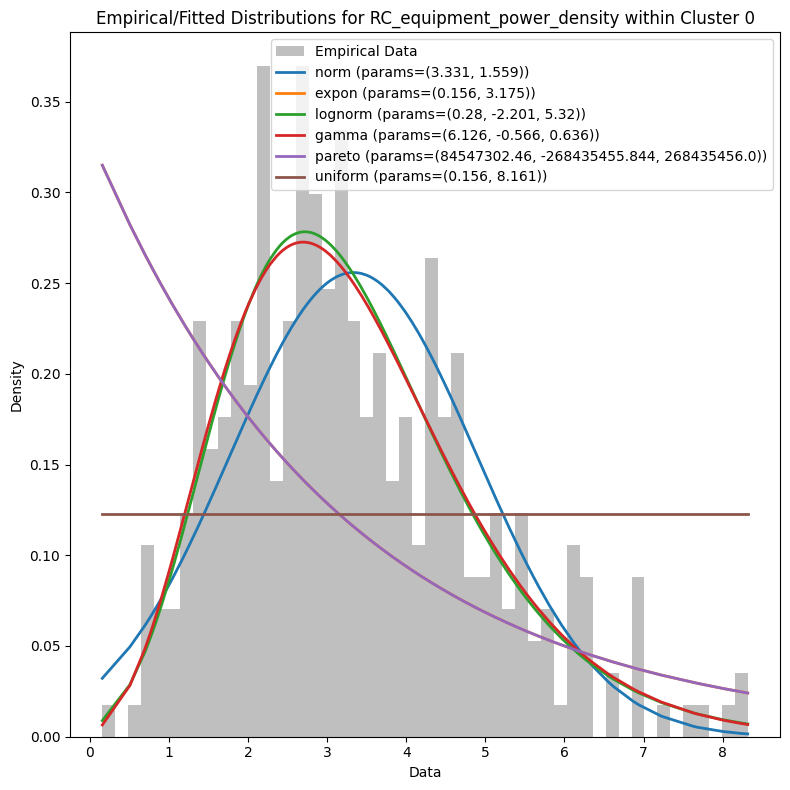

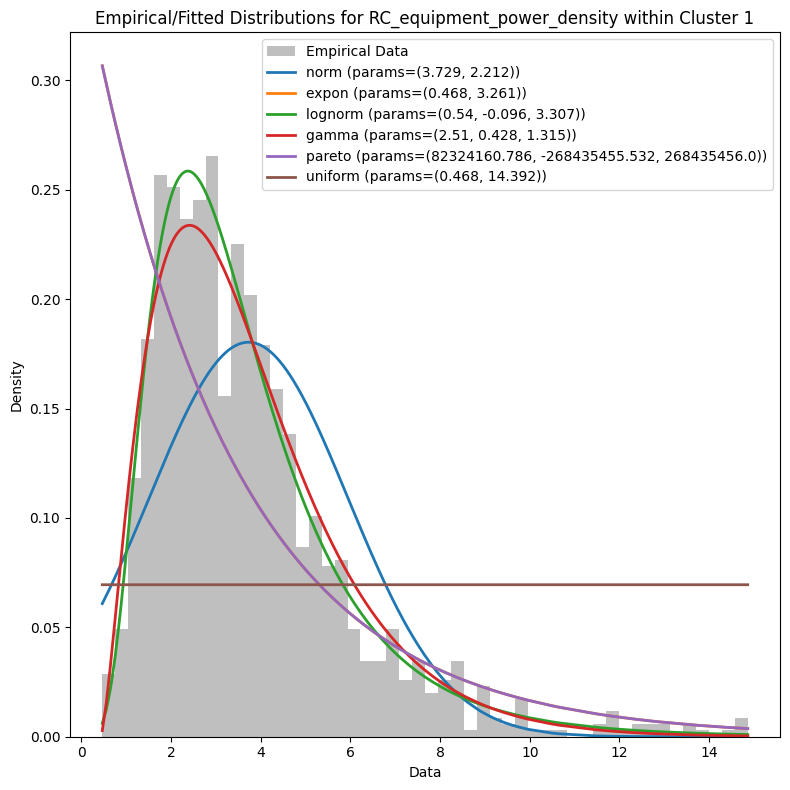

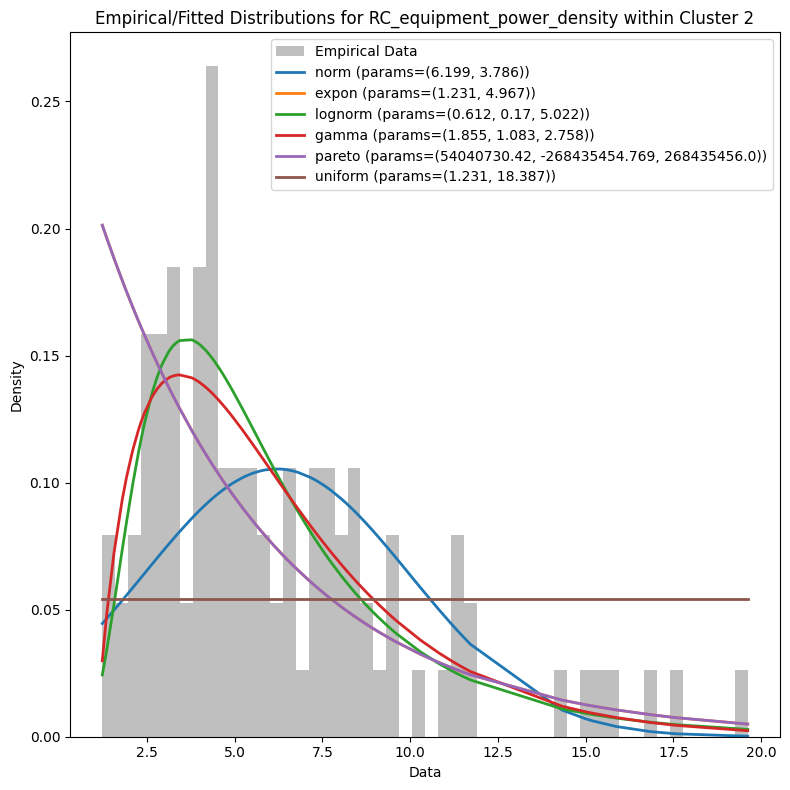

In [ ]:
edf = evaluate_distribution_fit(da['RC_equipment_power_density'].loc[metrics[N].labels==0], title_extra=' 0')
plt.gcf().savefig('print/epd1_fit.png')
edf = evaluate_distribution_fit(da['RC_equipment_power_density'].loc[metrics[N].labels==1], title_extra=' 1')
plt.gcf().savefig('print/epd2_fit.png')
edf = evaluate_distribution_fit(da['RC_equipment_power_density'].loc[metrics[N].labels==2], title_extra=' 2')
plt.gcf().savefig('print/epd3_fit.png')

In [ ]:

regular_display_df(edf)

,Distribution,Parameters,KS Statistic,KS P-value,KL Divergence,MSE,Log-Likelihood
0,norm,"[26.634, 27.945]",0.174,3.301e-03,0.566,1.278e-03,-4.892e+02
1,expon,"[0.e+00, 26.634]",0.122,0.086,0.303,1.013e-03,-4.411e+02
2,lognorm,"[239.776, -5.e-324, 2.831e-37]",0.517,3.803e-26,0.429,1.642e-03,7.957e+03
3,gamma,"[0.445, -6.846e-28, 34.687]",0.317,1.097e-09,0.372,8.577e-04,-4.344e+01
4,pareto,"[2.016e+07, -5.369e+08, 5.369e+08]",0.122,0.086,0.303,1.013e-03,-4.411e+02
5,uniform,"[0.e+00, 150.787]",0.538,1.831e-28,1.035,1.432e-03,-5.166e+02


In [ ]:
regular_display_df(tpl)

,Cluster,RC_equipment_power_density,RC_gas_power_density,RC_lighting_power_density
0,0.e+00,3.331,12.54,0.282
2,1,3.729,0.e+00,0.448
1,2,6.199,26.634,1.287
